In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'ML-Projects/food_classifier/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
#%%bash
#unzip -q images.zip -d data/dataset/

In [0]:
path = Path(base_dir + "data/dataset")

## Create databunch

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=256, num_workers=4).normalize(imagenet_stats)

In [5]:
data.c, len(data.train_ds), len(data.valid_ds)

(101, 80800, 20200)

## Model
### First train with only last 2 CNN portion unfreeze.

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


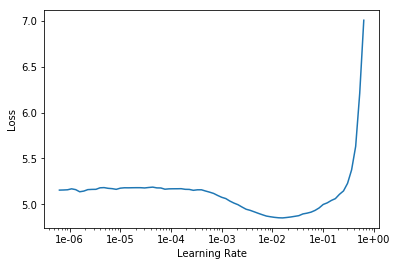

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-3

In [0]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.803735,1.389678,0.656584,2:56:01
1,1.192742,0.967337,0.738465,35:05
2,1.077924,0.886334,0.764703,35:04
3,0.889448,0.811935,0.783960,35:07
4,0.715920,0.742973,0.801485,35:03
5,0.571112,0.691862,0.816584,35:09
6,0.430008,0.649551,0.831188,35:07
7,0.304679,0.641931,0.838416,35:08
8,0.234373,0.634564,0.840594,35:09
9,0.195797,0.630481,0.841188,35:07


In [0]:
learn.save('final-1')

### Train with full resnet-50 model unfreeze at a lower learning rate

In [0]:
learn.load('final-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


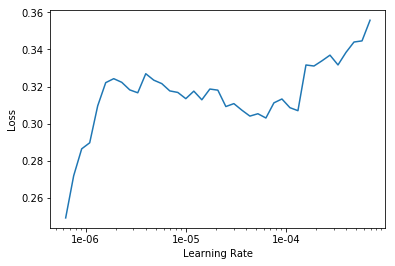

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr2=1e-5
learn.fit_one_cycle(10, slice(lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.314413,0.190059,0.951733,3:17:11
1,0.311551,0.189089,0.951733,39:39
2,0.298573,0.189519,0.952030,39:41
3,0.298434,0.189763,0.952376,39:33
4,0.290544,0.188566,0.952426,39:35
5,0.285376,0.188259,0.952574,39:15
6,0.284839,0.188428,0.952376,39:16
7,0.270545,0.189835,0.951980,39:13
8,0.275211,0.188769,0.952228,39:19
9,0.273017,0.188932,0.952772,39:09


In [0]:
learn.save('final-2')

### Finally train again with only last 2 CNN portion unfreeze

In [0]:
learn.load('final-2')

In [0]:
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


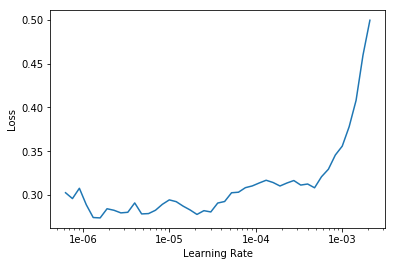

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
lr3=1e-5
learn.fit_one_cycle(5, slice(lr3))

epoch,train_loss,valid_loss,accuracy,time
0,0.273527,0.174113,0.955842,2:13:51
1,0.279080,0.175368,0.955990,33:13
2,0.287640,0.176111,0.955495,33:17
3,0.244410,0.176298,0.955396,33:13
4,0.248672,0.176327,0.955050,33:01


In [0]:
learn.save('final-3')

In [0]:
learn.export()

## Results

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

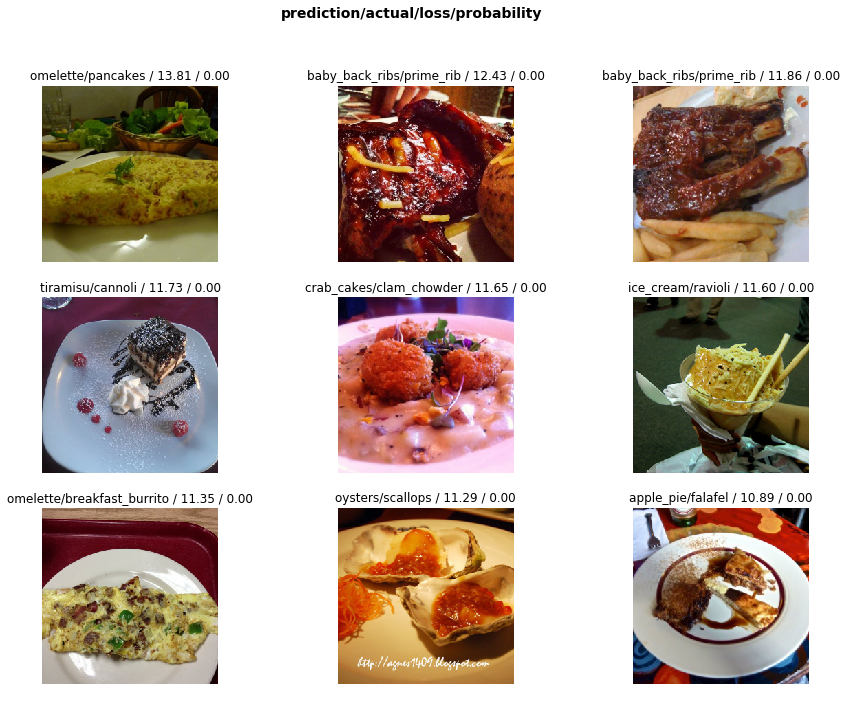

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

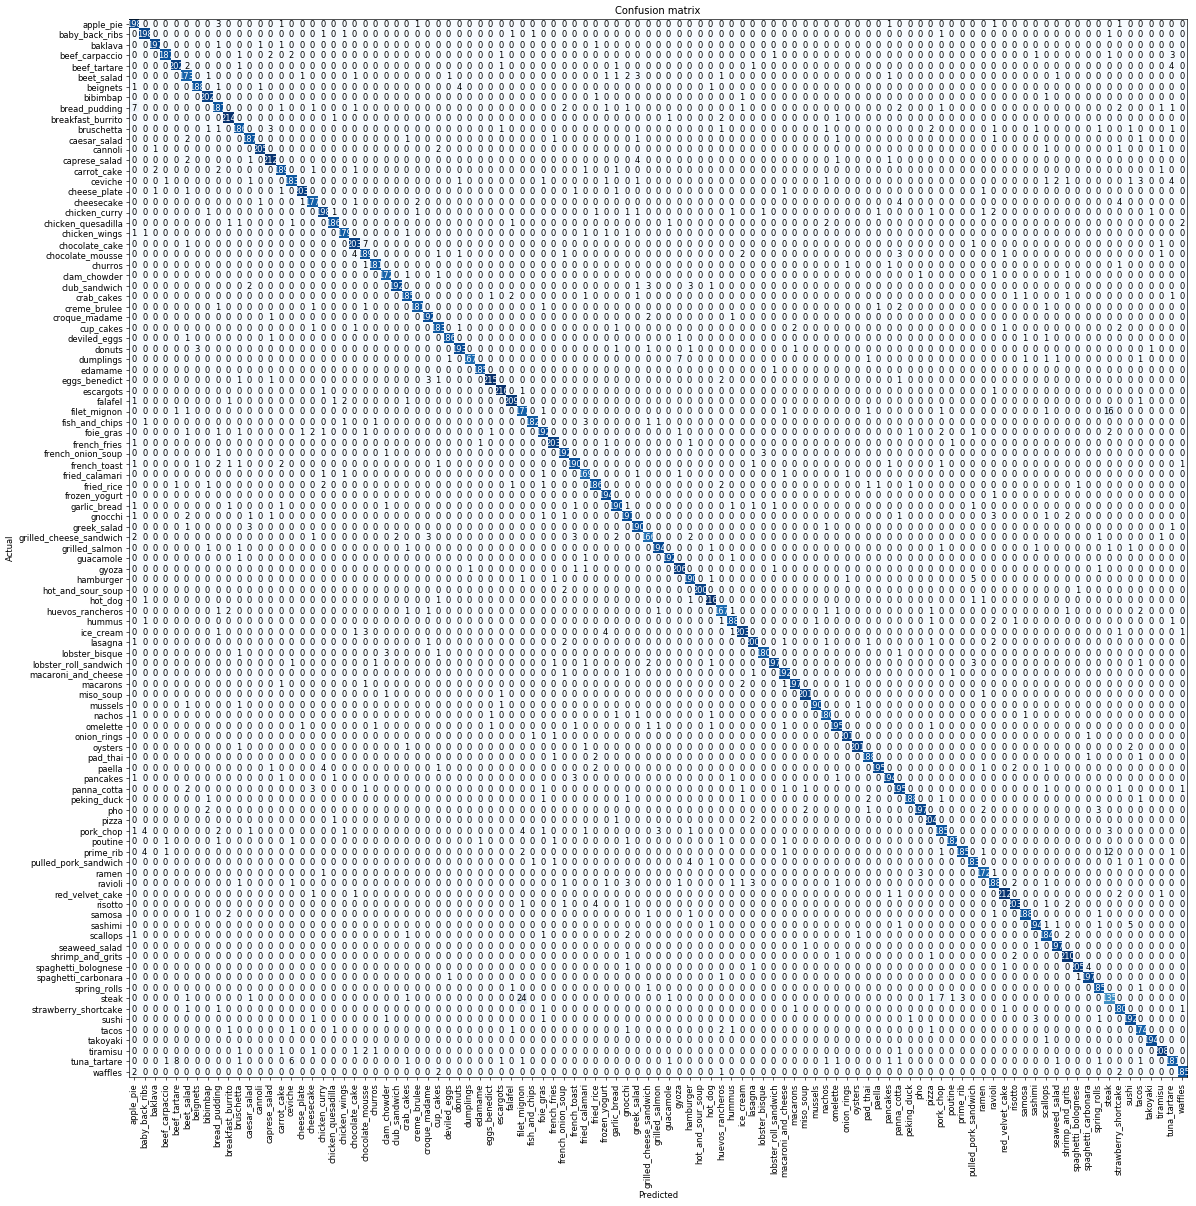

In [36]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [37]:
interp.most_confused(min_val=4)

[('steak', 'filet_mignon', 24),
 ('filet_mignon', 'steak', 16),
 ('prime_rib', 'steak', 12),
 ('tuna_tartare', 'beef_tartare', 8),
 ('bread_pudding', 'apple_pie', 7),
 ('chocolate_cake', 'chocolate_mousse', 7),
 ('dumplings', 'gyoza', 7),
 ('steak', 'pork_chop', 7),
 ('tuna_tartare', 'ceviche', 6),
 ('hamburger', 'pulled_pork_sandwich', 5),
 ('sashimi', 'sushi', 5),
 ('beef_tartare', 'tuna_tartare', 4),
 ('beignets', 'donuts', 4),
 ('caprese_salad', 'greek_salad', 4),
 ('ceviche', 'tuna_tartare', 4),
 ('cheesecake', 'panna_cotta', 4),
 ('cheesecake', 'strawberry_shortcake', 4),
 ('chocolate_mousse', 'chocolate_cake', 4),
 ('ice_cream', 'frozen_yogurt', 4),
 ('paella', 'chicken_curry', 4),
 ('pork_chop', 'baby_back_ribs', 4),
 ('pork_chop', 'filet_mignon', 4),
 ('prime_rib', 'baby_back_ribs', 4),
 ('pulled_pork_sandwich', 'hamburger', 4),
 ('risotto', 'fried_rice', 4),
 ('spaghetti_bolognese', 'spaghetti_carbonara', 4)]

In [0]:
leran=None
gc.collect()